# Data Loading

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("train_new.csv")

# data set link https://www.kaggle.com/c/cudlfinance/data?select=train_new.csv

In [ ]:
data.head()

,Unnamed: 0,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMG,AMGN,AMP,AMT,...,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WCG,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYNN,XEC,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS,Cash
0,01/01/2015,40.94,53.630,159.28,110.38,65.44,90.16,38.06,45.02,89.31,72.70,55.520,52.00,83.370,286.05,60.06,46.13,60.72,13.77,30.545,257.41,56.01,38.3087,68.43,47.08,62.96,60.13,55.91,59.76,70.25,55.46,185.03,24.920,NaN,NaN,52.63,212.24,159.29,132.25,98.85,...,76.6081,70.4994,75.25,49.50,65.73,86.1584,64.05,57.00,118.80,62.7924,46.78,86.89,112.72,76.20,82.06,110.70,52.74,75.67,54.82,193.74,NaN,51.32,44.94,85.88,NaN,17.91,35.89,148.76,106.00,NaN,43.290,92.45,53.27,36.5155,38.07,52.3831,113.42,28.510,43.03,0.0355
1,02/01/2015,40.56,53.910,158.56,109.33,65.89,90.46,37.31,44.90,88.84,72.34,55.540,52.02,83.290,285.37,59.53,45.99,61.15,13.70,30.540,259.13,56.11,39.0718,67.77,46.98,63.25,60.31,56.20,60.33,70.12,55.05,186.60,24.960,NaN,2.69,52.62,210.43,159.89,132.09,99.67,...,77.0597,69.4264,75.40,50.34,66.98,87.3735,63.97,57.19,123.07,64.2024,46.96,87.11,113.88,76.00,80.87,110.43,53.19,76.95,54.70,193.01,NaN,51.75,45.22,85.90,NaN,17.93,36.11,146.89,106.88,NaN,43.600,92.83,51.93,36.2257,38.08,52.0236,112.59,28.290,43.31,0.0152
2,05/01/2015,39.80,53.875,156.47,106.25,64.65,89.69,37.07,44.91,87.34,71.98,54.525,50.22,83.230,281.40,58.66,45.53,60.25,13.31,29.740,256.69,55.00,39.4121,66.25,46.70,61.94,58.31,56.99,59.47,68.73,54.94,182.17,24.160,NaN,2.66,51.04,202.80,157.99,127.85,98.23,...,75.9262,68.8428,73.30,48.27,65.13,87.5930,63.14,56.24,121.03,64.5265,46.57,85.14,113.02,74.50,79.07,108.97,52.54,77.90,53.20,189.03,NaN,51.23,43.43,85.65,NaN,17.76,36.11,144.39,100.69,NaN,42.795,90.29,51.57,35.4353,35.71,50.9666,116.79,27.230,43.05,0.0101
3,06/01/2015,39.18,53.040,156.36,106.26,64.33,90.18,36.13,44.40,86.71,70.53,53.250,49.23,82.535,277.82,57.50,45.00,60.58,13.01,29.475,255.17,54.22,39.7318,65.33,46.61,60.67,57.17,57.45,58.77,68.68,54.85,177.95,23.250,NaN,2.63,50.06,198.43,152.90,124.41,97.97,...,75.1470,68.4381,71.85,47.68,64.98,88.3030,62.92,55.18,117.36,65.9627,47.04,84.04,112.53,74.69,77.82,106.54,52.68,79.01,52.09,187.47,NaN,51.27,42.84,86.31,NaN,17.73,36.07,141.31,98.92,NaN,42.180,89.81,50.93,34.9611,35.50,50.3410,115.80,26.190,42.63,0.0253
4,07/01/2015,39.70,53.010,159.72,107.75,66.93,91.98,37.28,44.76,88.53,71.11,53.810,49.97,83.260,279.95,57.38,45.35,61.44,13.03,29.660,265.23,54.48,40.1339,65.59,47.06,60.16,56.94,59.57,59.67,69.81,55.60,187.93,23.465,NaN,2.58,50.21,203.30,158.24,126.62,99.00,...,76.9003,69.3134,71.30,47.31,66.21,90.1695,62.96,55.64,120.66,66.9436,46.19,84.86,115.93,76.60,79.29,108.14,53.33,79.74,52.40,191.88,NaN,51.31,42.61,88.60,NaN,17.56,36.18,145.46,98.08,NaN,42.195,90.72,52.25,35.4089,35.78,52.0092,118.68,26.435,43.51,0.0203


In [ ]:
data.columns

Index(['Unnamed: 0', 'A ', 'AAL ', 'AAP ', 'AAPL ', 'ABBV ', 'ABC ', 'ABMD ',
       'ABT ', 'ACN ',
       ...
       'XLNX ', 'XOM ', 'XRAY ', 'XRX ', 'XYL ', 'YUM ', 'ZBH ', 'ZION ',
       'ZTS ', 'Cash'],
      dtype='object', length=507)

In [ ]:
# sum of null values in the data
data.isna().sum()

Unnamed: 0    0
A             0
AAL           0
AAP           0
AAPL          0
             ..
YUM           0
ZBH           0
ZION          0
ZTS           0
Cash          0
Length: 507, dtype: int64

In [ ]:
# # converting date column from object to datetime
# data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])

# Trend Analysis

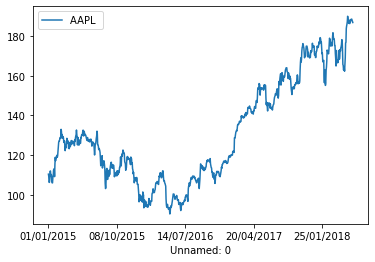

In [ ]:
import matplotlib.pyplot as plt

# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

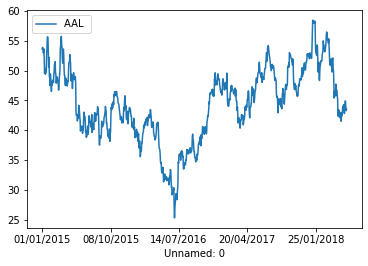

In [ ]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'AAL ')
plt.show()

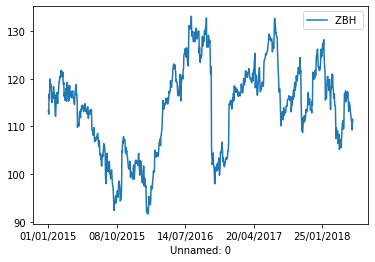

In [ ]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'ZBH ')
plt.show()

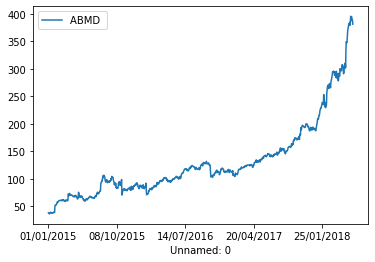

In [ ]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'ABMD ')
plt.show()

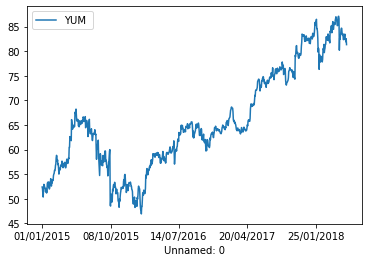

In [ ]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'YUM ')
plt.show()

# Selecting stock

In [ ]:
data_stock = data['AAPL ']

In [ ]:
data_stock.shape

(891,)

In [ ]:
891 - 178


713

In [ ]:
data_stock_np = np.array(data_stock)

In [ ]:
data_stock_np[-15]

188.59

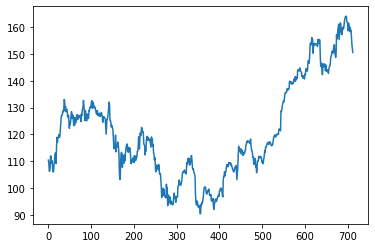

In [ ]:
data_stock[:713].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

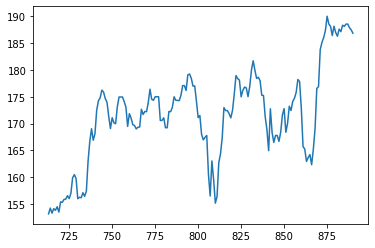

In [ ]:
data_stock[-178:].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

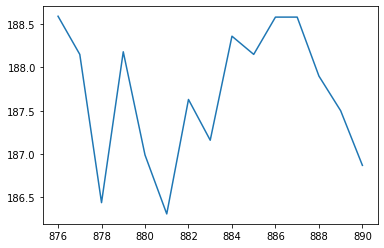

In [ ]:
data_stock[-15:].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

# Utility function

In [ ]:
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Bidirectional
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
from tensorflow.keras import layers

# converting the series data to supervised data
def series_data_to_supervised_data(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# finding difference between rows
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# inverting the difference value
def inverse_the_difference(history_data, yhat, interval=1):
 
  return (yhat+history_data[-interval])
 
# scaling the difference
def scale(train, test):
	# scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)

	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)

	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse the scaling 
def invert_scale(scaler, X, value):
	temp = [x for x in X] + [value]
	array = numpy.array(temp)
	array = array.reshape(1, len(array))
	data_inverted = scaler.inverse_transform(array)
	return data_inverted[0, -1]
 
# LSTM model
def fit_lstm(train, batchSize, epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
 
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(epoch):
		model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False)
		model.reset_states()
	return model


# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

def fit_rnn(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])

  
  #RNN model
  
  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])

  model = Sequential()
  model.add(layers.SimpleRNN(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2])))
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
 
 
  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
  

# make a one-step forecast
def forecast_rnn(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
  
def fit_cnn(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])
  
  #CNN model
  model = Sequential()
  model.add(layers.Conv1D(neurons,1, batch_input_shape=(batchSize, X.shape[1], X.shape[2])))
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  
   #model.add(layers.Dense(3, activation='sigmoid'))
  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model


# make a one-step forecast
def forecast_cnn(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
  

  
def fit_bilstm(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  model = Sequential()


  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])
  
  # Bi LSTM Model
  model = Sequential()
  model.add(Bidirectional(LSTM(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2]), stateful=True)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  #model.add(layers.Dense(3, activation='sigmoid'))
  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model


# make a one-step forecast
def forecast_bilstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


# LSTM

In [ ]:
data_stock.shape

(891,)

In [ ]:
0.20 * 891

178.20000000000002


 Test RMSE: 2.379


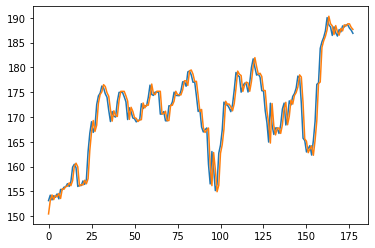

In [ ]:

# modify data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised 
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data 
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1, 4)

# forecast 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 

##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows


 Test RMSE: 0.932


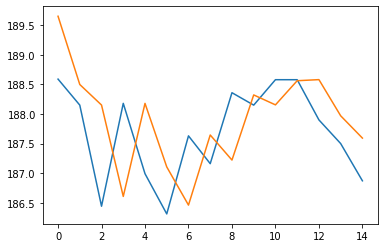

In [ ]:

# modify data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised 
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data 
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1, 4)

# forecast 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 

##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# RNN

X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=151.365079, Expected=153.140000
Month=2, Predicted=153.860041, Expected=154.230000
Month=3, Predicted=154.974440, Expected=153.280000
Month=4, Predicted=154.080877, Expected=154.120000
Month=5, Predicted=154.869833, Expected=153.810000
Month=6, Predicted=154.590022, Expected=154.480000
Month=7, Predicted=155.233731, Expected=153.480000
Month=8, Predicted=154.282634, Expected=155.390000
Month=9, Predicted=156.119480, Expected=155.300000
Month=10, Predicted=156.073539, Expected=155.840000
Month=11, Predicted=156.596841, Expected=155.900000
Month=12, Predicted=156.669315, Expected=156.550000
Month=13, Predicted=157.304203, Expected=156.000000
Month=14, Predicted=156.787492, Expected=156.990000
Month=15, Predicted=157.736549, Expected=159.880000
Month=16, Predicted=160.596671, Expected=160.470000
Month=17, Predicted=161.225632, Expected=159.760000
Month=18, Predicted=160.552704, Expected=155.980000
Month=19, Predicted=156.910692, Expected=1

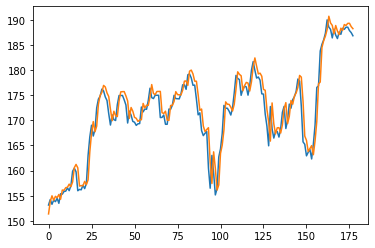

In [ ]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised 
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data 
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_rnn(train_scaled, 1, 1, 4)

# forecast 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_rnn(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 

##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=191.077884, Expected=188.590000
Month=2, Predicted=189.605597, Expected=188.150000
Month=3, Predicted=189.149991, Expected=186.440000
Month=4, Predicted=187.461784, Expected=188.180000
Month=5, Predicted=189.192958, Expected=186.990000
Month=6, Predicted=188.000290, Expected=186.310000
Month=7, Predicted=187.312471, Expected=187.630000
Month=8, Predicted=188.635515, Expected=187.160000
Month=9, Predicted=188.160259, Expected=188.360000
Month=10, Predicted=189.363816, Expected=188.150000
Month=11, Predicted=189.148341, Expected=188.580000
Month=12, Predicted=189.577505, Expected=188.580000
Month=13, Predicted=189.577457, Expected=187.900000
Month=14, Predicted=188.902471, Expected=187.500000
Month=15, Predicted=188.499653, Expected=186.870000

 Test RMSE: 1.558


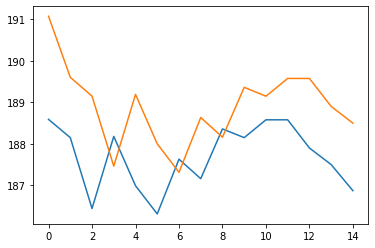

In [ ]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised 
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data 
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_rnn(train_scaled, 1, 1, 4)

# forecast 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_rnn(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 

##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# CNN Model


X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=151.164702, Expected=153.140000
Month=2, Predicted=152.479176, Expected=154.230000
Month=3, Predicted=154.056018, Expected=153.280000
Month=4, Predicted=153.768123, Expected=154.120000
Month=5, Predicted=154.027158, Expected=153.810000
Month=6, Predicted=154.090404, Expected=154.480000
Month=7, Predicted=154.442334, Expected=153.480000
Month=8, Predicted=153.984351, Expected=155.390000
Month=9, Predicted=154.949878, Expected=155.300000
Month=10, Predicted=155.509000, Expected=155.840000
Month=11, Predicted=155.844527, Expected=155.900000
Month=12, Predicted=156.060316, Expected=156.550000
Month=13, Predicted=156.518825, Expected=156.000000
Month=14, Predicted=156.358298, Expected=156.990000
Month=15, Predicted=156.848474, Expected=159.880000
Month=16, Predicted=159.121808, Expected=160.470000
Month=17, Predicted=160.458299, Expected=159.760000
Month=18, Predicted=160.170228, Expected=155.980000
Month=19, Predicted=157.386631, Expected=1

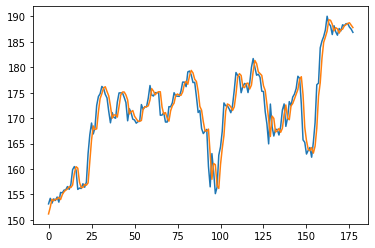

In [ ]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised 
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data 
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
cnn_model = fit_cnn(train_scaled, 1, 1, 1)

# forecast 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
cnn_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_cnn(cnn_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 

##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=191.217670, Expected=188.590000
Month=2, Predicted=188.096690, Expected=188.150000
Month=3, Predicted=188.065332, Expected=186.440000
Month=4, Predicted=185.841496, Expected=188.180000
Month=5, Predicted=188.977350, Expected=186.990000
Month=6, Predicted=186.601885, Expected=186.310000
Month=7, Predicted=186.128229, Expected=187.630000
Month=8, Predicted=188.257420, Expected=187.160000
Month=9, Predicted=187.063194, Expected=188.360000
Month=10, Predicted=188.938869, Expected=188.150000
Month=11, Predicted=188.158389, Expected=188.580000
Month=12, Predicted=188.847330, Expected=188.580000
Month=13, Predicted=188.673354, Expected=187.900000
Month=14, Predicted=187.718229, Expected=187.500000
Month=15, Predicted=187.431516, Expected=186.870000
Test RMSE: 1.317


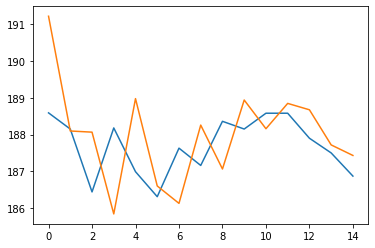

In [ ]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised 
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data 
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
cnn_model = fit_cnn(train_scaled, 1, 1, 1)

# forecast 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
cnn_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_cnn(cnn_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 

##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# Bi-directional LSTM


X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=151.064520, Expected=153.140000
Month=2, Predicted=153.332586, Expected=154.230000
Month=3, Predicted=154.347810, Expected=153.280000
Month=4, Predicted=153.490721, Expected=154.120000
Month=5, Predicted=154.269637, Expected=153.810000
Month=6, Predicted=154.000115, Expected=154.480000
Month=7, Predicted=154.628409, Expected=153.480000
Month=8, Predicted=153.715195, Expected=155.390000
Month=9, Predicted=155.473713, Expected=155.300000
Month=10, Predicted=155.431141, Expected=155.840000
Month=11, Predicted=155.960013, Expected=155.900000
Month=12, Predicted=156.045648, Expected=156.550000
Month=13, Predicted=156.671347, Expected=156.000000
Month=14, Predicted=156.187421, Expected=156.990000
Month=15, Predicted=157.113332, Expected=159.880000
Month=16, Predicted=159.822547, Expected=160.470000
Month=17, Predicted=160.463185, Expected=159.760000
Month=18, Predicted=159.871461, Expected=155.980000
Month=19, Predicted=156.354863, Expected=1

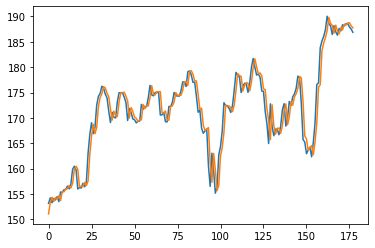

In [ ]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised 
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data 
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
bilstm_model = fit_bilstm(train_scaled, 1, 1, 1)

# forecast 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
bilstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_bilstm(bilstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 

##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
Month=1, Predicted=187.122037, Expected=186.310000
Month=2, Predicted=186.437226, Expected=187.630000
Month=3, Predicted=187.777058, Expected=187.160000
Month=4, Predicted=187.299754, Expected=188.360000
Month=5, Predicted=188.513399, Expected=188.150000
Month=6, Predicted=188.295878, Expected=188.580000
Month=7, Predicted=188.728471, Expected=188.580000
Month=8, Predicted=188.725417, Expected=187.900000
Month=9, Predicted=188.036135, Expected=187.500000
Month=10, Predicted=187.633219, Expected=186.870000

 Test RMSE: 0.733


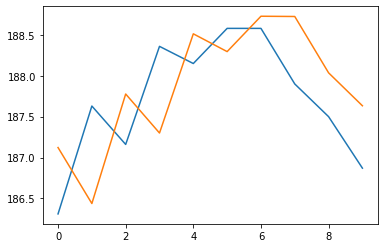

In [ ]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised 
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data 
train, test = supervised_values[0:-10], supervised_values[-10:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
bilstm_model = fit_bilstm(train_scaled, 1, 1, 1)

# forecast 
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
bilstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_bilstm(bilstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
  
	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 

##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-10:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-10:])
pyplot.plot(predictions)
pyplot.show()

# Arima Model

In [ ]:
pip install statsmodels

In [ ]:
import numpy as np
data_stock_np = np.array(data_stock)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot

#data = data[['Date']]
data = np.asarray(data_stock_np)



/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  890
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1800.281
Method:                       css-mle   S.D. of innovations              1.826
Date:                Sun, 05 Sep 2021   AIC                           3624.562
Time:                        05:29:19   BIC                           3682.056
Sample:                             1   HQIC                          3646.537
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0862      0.062      1.393      0.164      -0.035       0.208
ar.L1.D.y      0.0238      0.051      0.471      0.638      -0.075       0.123
ar.L2.D.y     -0.0417      0.056     -0.743      0.4

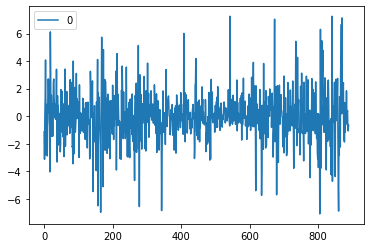

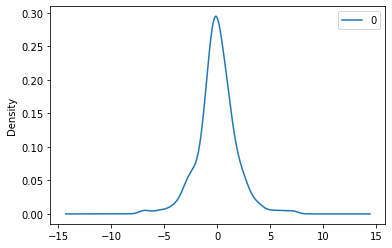

                0
count  890.000000
mean    -0.000503
std      1.830216
min     -7.101085
25%     -0.835823
50%     -0.046468
75%      0.899095
max      7.253877


In [ ]:
model = ARIMA(data, order=(5,1,5))

model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=143.668427, expected=144.770000
predicted=144.848507, expected=144.020000
predicted=144.041763, expected=143.660000
predicted=143.708148, expected=143.340000
predicted=143.440746, expected=143.170000
predicted=143.223347, expected=141.630000
predicted=141.721748, expected=141.800000
predicted=141.941867, expected=141.050000
predicted=141.175994, expected=141.050000
predicted=141.139854, expected=141.830000
predicted=141.989761, expected=141.200000
predicted=141.219114, expected=140.680000
predicted=140.746489, expected=142.440000
predicted=142.563760, expected=142.270000
predicted=142.257909, expected=143.640000
predicted=143.669840, expected=144.530000
predicted=144.570777, expected=143.680000
predicted=143.575383, expected=143.790000
predicted=143.843177, expected=143.650000
predicted=143.686802, expected=146.580000
predicted=146.651004, expected=147.510000
predicted=147.516035, expected=147.060000
predicted=146.952075, expected=146.530000
predicted=146.552823, expected=148

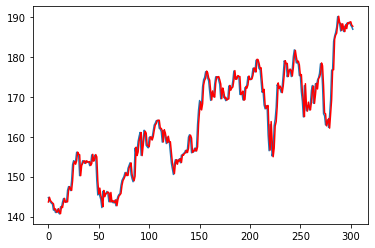

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
X = data
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)

pyplot.plot(predictions, color='red')
pyplot.show()

predicted=190.106288, expected=188.590000
predicted=188.318561, expected=188.150000
predicted=188.105829, expected=186.440000
predicted=186.356454, expected=188.180000
predicted=188.028814, expected=186.990000
predicted=186.666708, expected=186.310000
predicted=186.038970, expected=187.630000
predicted=187.748861, expected=187.160000
predicted=186.885872, expected=188.360000
predicted=188.310233, expected=188.150000
predicted=188.128441, expected=188.580000
predicted=188.502120, expected=188.580000
predicted=188.591922, expected=187.900000
predicted=187.778407, expected=187.500000
predicted=187.473149, expected=186.870000
Test RMSE: 1.028


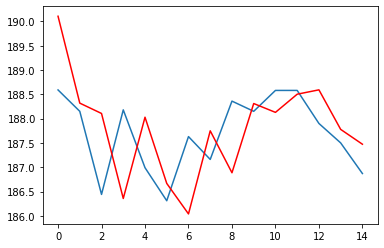

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
X = data
size = 876
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)

pyplot.plot(predictions, color='red')
pyplot.show()

# Make results for comparision

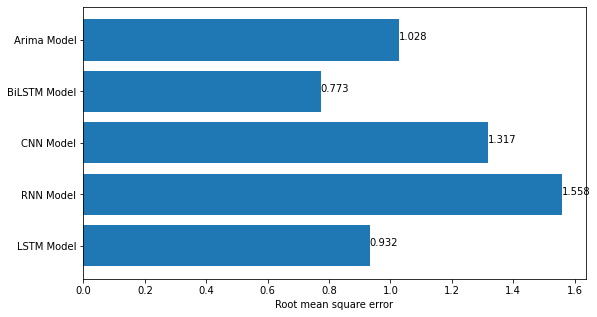

In [ ]:
plt.figure(figsize=(9, 5))

# models 
Models_used = ["LSTM Model", "RNN Model", "CNN Model","BiLSTM Model","Arima Model"]

# metrics of the model in list format
rmse_of_models = [0.932,1.558, 1.317 ,0.773,1.028]

plt.barh(Models_used, rmse_of_models)
plt.xlabel("Root mean square error") 
for index, value in enumerate(rmse_of_models):
    plt.text(value, index,
             str(value))
  
plt.show()